In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from dython import nominal
from pycaret.regression import *


In [2]:
df=pd.read_csv("Dataset .csv")
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [3]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [4]:
df.dropna(inplace=True)
df.drop('Switch to order menu', axis=1, inplace = True)
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


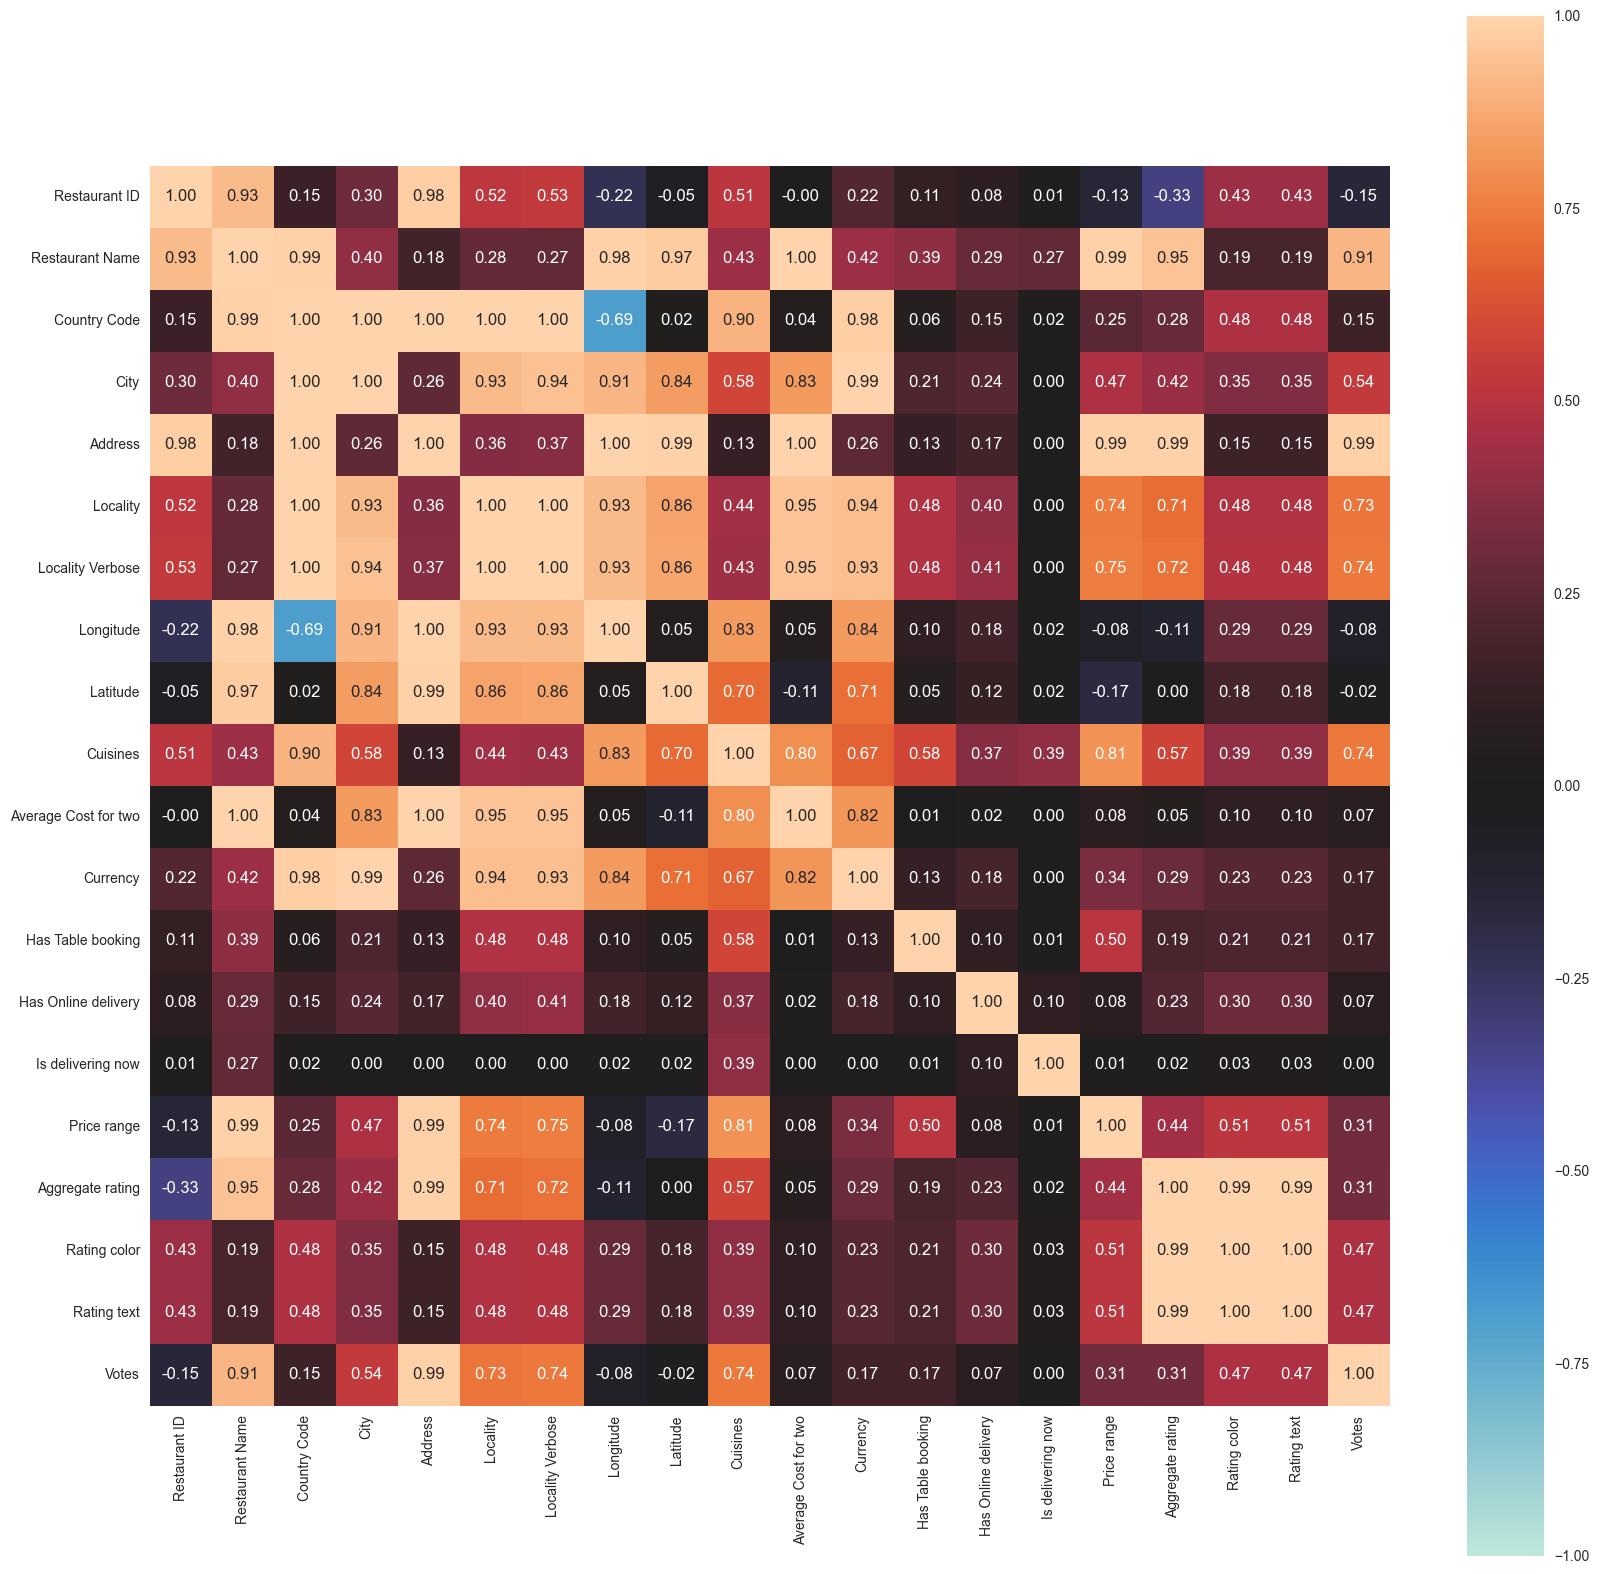

In [5]:
nominal.associations(df,figsize=(20,20))
plt.show()

In [6]:
df["Address"].value_counts()

Address
Dilli Haat, INA, New Delhi                                                   11
Sector 41, Noida                                                             11
Greater Kailash (GK) 1, New Delhi                                            10
The Imperial, Janpath, New Delhi                                              9
Cyber Hub, DLF Cyber City, Gurgaon                                            8
                                                                             ..
108 & 126, Flyover Market, Defence Colony, New Delhi                          1
Shop 25,27 & 29, Defence Colony Flyover Market, Defence Colony, New Delhi     1
D  Block, Defence Colony, New Delhi                                           1
A-1, Defence Colony, New Delhi                                                1
Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k�_y, ��stanbul             1
Name: count, Length: 8910, dtype: int64

In [7]:
encoder=LabelEncoder()
df['Restaurant Name'] = encoder.fit_transform(df['Restaurant Name'])
df['City'] = encoder.fit_transform(df['City'])
df['Address'] = encoder.fit_transform(df['Address'])
df['Locality'] = encoder.fit_transform(df['Locality'])
df['Locality Verbose'] = encoder.fit_transform(df['Locality Verbose'])
df['Currency'] = encoder.fit_transform(df['Currency'])
df['Has Online delivery'] = encoder.fit_transform(df['Has Online delivery'])
df['Cuisines'] = encoder.fit_transform(df['Cuisines'])
df['Has Table booking'] = encoder.fit_transform(df['Has Table booking'])
df['Is delivering now'] = encoder.fit_transform(df['Is delivering now'])
df['Rating color'] = encoder.fit_transform(df['Rating color'])
df['Rating text'] = encoder.fit_transform(df['Rating text'])

In [8]:
normalize=StandardScaler()
df['Votes'] = normalize.fit_transform(df[['Votes']])
df['Price range'] = normalize.fit_transform(df[['Price range']])

In [9]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3742,162,73,8677,171,172,121.027535,14.565443,920,1100,0,1,0,0,1.319726,4.8,0,1,0.365493
1,6304287,3167,162,73,6047,592,600,121.014101,14.553708,1111,1200,0,1,0,0,1.319726,4.5,0,1,1.009408
2,6300002,2892,162,75,4676,308,314,121.056831,14.581404,1671,4000,0,1,0,0,2.424069,4.4,1,5,0.263210
3,6318506,4700,162,75,8682,860,873,121.056475,14.585318,1126,1500,0,0,0,0,2.424069,4.9,0,1,0.484048
4,6314302,5515,162,75,8681,860,873,121.057508,14.584450,1122,1500,0,1,0,0,2.424069,4.8,0,1,0.167901


In [10]:
x = df[['Restaurant Name', 'Country Code', 'City',
       'Locality', 'Locality Verbose', 'Cuisines', 'Currency',
       'Has Online delivery', 'Price range', 'Votes']]
y = df['Aggregate rating']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)
model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [12]:
y_pred=model1.predict(x_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5 
mae = mean_absolute_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred) 
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-Squared: {r2}")

MSE: 0.09430599947616554
RMSE: 0.3070928189915315
MAE: 0.19963069669984287
R-Squared: 0.9588189199133316


In [14]:
train_data = pd.concat([x_train, y_train], axis=1)
s = setup(train_data, target='Aggregate rating', session_id=42)
best_model = compare_models()


,Description,Value
0,Session id,42
1,Target,Aggregate rating
2,Target type,Regression
3,Original data shape,"(7633, 11)"
4,Transformed data shape,"(7633, 11)"
5,Transformed train set shape,"(5343, 11)"
6,Transformed test set shape,"(2290, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2011,0.0940,0.3063,0.9582,0.0718,0.0779,0.1970
gbr,Gradient Boosting Regressor,0.2090,0.0994,0.3150,0.9558,0.0747,0.0800,0.1170
rf,Random Forest Regressor,0.2043,0.1008,0.3174,0.9552,0.0740,0.0800,0.2630
et,Extra Trees Regressor,0.2318,0.1199,0.3460,0.9468,0.1015,0.0844,0.1590
ada,AdaBoost Regressor,0.2552,0.1378,0.3711,0.9388,0.0848,0.0975,0.0420
dt,Decision Tree Regressor,0.2843,0.1931,0.4393,0.9142,0.1030,0.1100,0.0110
lr,Linear Regression,1.0444,1.5895,1.2605,0.2944,0.5588,0.2253,0.6780
ridge,Ridge Regression,1.0443,1.5895,1.2605,0.2944,0.5588,0.2253,0.0080
br,Bayesian Ridge,1.0440,1.5896,1.2605,0.2944,0.5591,0.2247,0.0090
huber,Huber Regressor,1.0821,1.9693,1.4029,0.1264,0.6077,0.1963,0.0220


Light Gradient Boosting Machine is best to Predict Restaurant Ratings
with MAE,MSE,RMSE,RMSLE,MAPE of 0.2011, 0.0940,	0.3063,	0.9582,	0.0718,	0.0779  Resp.


Task 1 completed: To Build a machine learning model to predict theaggregate rating of a restaurant based on other features